Q1.

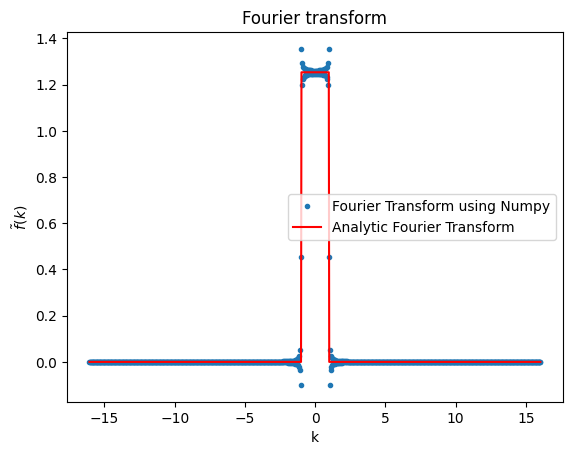

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def sinc(x):
  if(x==0):
   return 1
  else:
   return np.sin(x)/x

def Box(x):
  if(x>1):
    return 0
  elif(x<-1):
    return 0
  else:
    return(np.sqrt(np.pi/2))

n=1024
xmax=100
xmin=-100
dx=(xmax-xmin)/(n-1)
x= np.arange(xmin,xmax+dx,dx,dtype=np.complex_)

data=np.zeros(n,dtype=np.complex_)
box=np.zeros(n,dtype=np.complex_)
k=np.fft.fftfreq(n,dx)
k=2*np.pi*k
kk=np.linspace(k.min(),k.max(),num=n,endpoint=True)
for i in range(0,n,1):
  data[i]=sinc(x[i])
  box[i]=Box(kk[i])



nft=np.fft.fft(data,norm='ortho')
aft=dx*np.sqrt(n/(2.0*np.pi))*(np.exp(-1j*k*x.min()))*nft

plt.plot(k,aft.real,".", label="Fourier Transform using Numpy")
plt.plot(kk,box.real,color="red", label="Analytic Fourier Transform")
plt.title("Fourier transform")
plt.xlabel("k")
plt.ylabel("$\\tilde f(k)$")
plt.legend()
plt.show()



Q2.

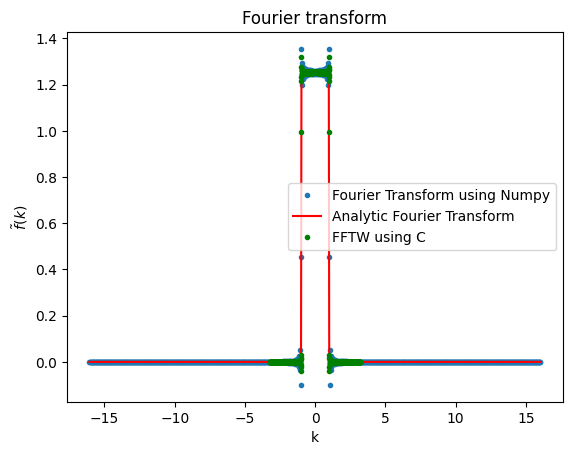

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def sinc(x):
  if(x==0):
   return 1
  else:
   return np.sin(x)/x

def Box(x):
  if(x>1):
    return 0
  elif(x<-1):
    return 0
  else:
    return(np.sqrt(np.pi/2))

n=1024
xmax=100
xmin=-100
dx=(xmax-xmin)/(n-1)
x= np.arange(xmin,xmax+dx,dx,dtype=np.complex_)

data=np.zeros(n,dtype=np.complex_)
box=np.zeros(n,dtype=np.complex_)
k=np.fft.fftfreq(n,dx)
k=2*np.pi*k
kk=np.linspace(k.min(),k.max(),num=n,endpoint=True)
for i in range(0,n,1):
  data[i]=sinc(x[i])
  box[i]=Box(kk[i])

# Open the file for reading
with open('fftdata.txt', 'r') as file:
    # Initialize empty lists to store the data
    xc = []
    yc = []

    # Read each line in the file
    for line in file:
        # Split the line into two parts based on whitespace
        parts = line.split()

        # Convert the parts to floating point numbers and append them to the x and y lists
        xc.append(float(parts[0]))
        yc.append(float(parts[1]))



nft=np.fft.fft(data,norm='ortho')
aft=dx*np.sqrt(n/(2.0*np.pi))*(np.exp(-1j*k*x.min()))*nft


plt.plot(k,aft.real,".", label="Fourier Transform using Numpy")
plt.plot(kk,box.real,color="red", label="Analytic Fourier Transform")
plt.plot(xc,yc,".",color='green', label="FFTW using C")
plt.title("Fourier transform")
plt.xlabel("k")
plt.ylabel("$\\tilde f (k)$")
plt.legend()
plt.show()



Q3.

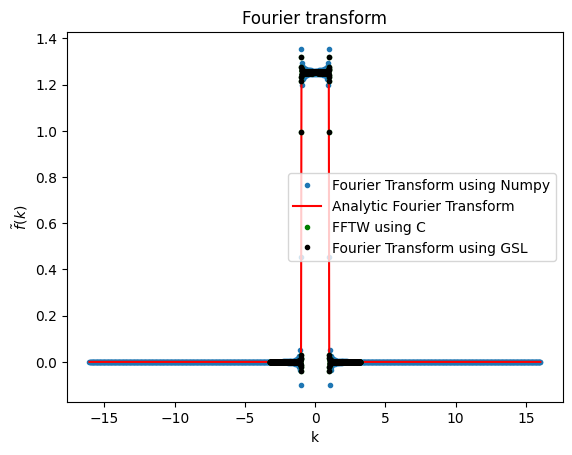

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def sinc(x):
  if(x==0):
   return 1
  else:
   return np.sin(x)/x

def Box(x):
  if(x>1):
    return 0
  elif(x<-1):
    return 0
  else:
    return(np.sqrt(np.pi/2))

n=1024
xmax=100
xmin=-100
dx=(xmax-xmin)/(n-1)
x= np.arange(xmin,xmax+dx,dx,dtype=np.complex_)

data=np.zeros(n,dtype=np.complex_)
box=np.zeros(n,dtype=np.complex_)
k=np.fft.fftfreq(n,dx)
k=2*np.pi*k
kk=np.linspace(k.min(),k.max(),num=n,endpoint=True)
for i in range(0,n,1):
  data[i]=sinc(x[i])
  box[i]=Box(kk[i])

# Open the file for reading
with open('fftdata.txt', 'r') as file:
    # Initialize empty lists to store the data
    xc = []
    yc = []

    # Read each line in the file
    for line in file:
        # Split the line into two parts based on whitespace
        parts = line.split()

        # Convert the parts to floating point numbers and append them to the x and y lists
        xc.append(float(parts[0]))
        yc.append(float(parts[1]))

# Open the file for reading
with open('fftgsl.txt', 'r') as file:
    # Initialize empty lists to store the data
    xgsl = []
    ygsl = []

    # Read each line in the file
    for line in file:
        # Split the line into two parts based on whitespace
        parts = line.split()

        # Convert the parts to floating point numbers and append them to the x and y lists
        xgsl.append(float(parts[0]))
        ygsl.append(float(parts[1]))


nft=np.fft.fft(data,norm='ortho')
aft=dx*np.sqrt(n/(2.0*np.pi))*(np.exp(-1j*k*x.min()))*nft


plt.plot(k,aft.real,".", label="Fourier Transform using Numpy")
plt.plot(kk,box.real,color="red", label="Analytic Fourier Transform")
plt.plot(xc,yc,".",color='green', label="FFTW using C")
plt.plot(xgsl,ygsl,".",color='black', label="Fourier Transform using GSL")
plt.title("Fourier transform")
plt.xlabel("k")
plt.ylabel("$\\tilde f(k)$")
plt.legend()
plt.show()



Q4.

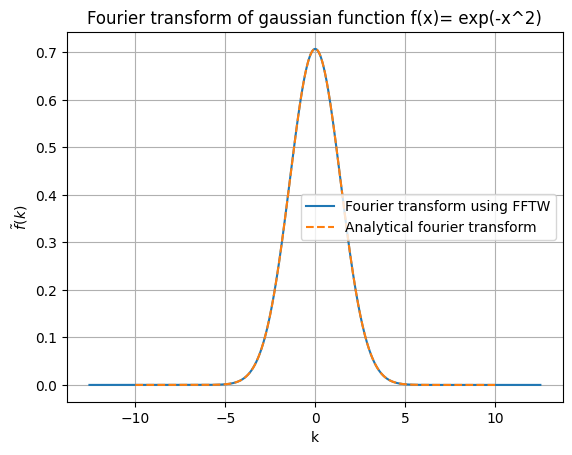

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def analytical(x):
    return (np.exp(-x**2 / 4)/np.sqrt(2))
# Opening the file for reading
with open('fftgauss.txt', 'r') as file:
    # Initialize empty lists to store the data
    x = []
    y = []

    # Reading each line in the file
    for line in file:
        # Splitting the line into two parts based on whitespace
        parts = line.split()

        # Converting the parts to floating point numbers and append them to the x and y lists
        x.append(float(parts[0]))
        y.append(float(parts[1]))
y=np.fft.fftshift(y)
x=np.fft.fftshift(x)
n=1024
truesol=np.zeros(n,dtype=np.complex_)
x1=np.zeros(n,dtype=np.complex_)
x1min=-10
x1max=10

dx1=(x1max-x1min)/(n-1)
for i in range(n):
  x1[i]=x1min + i*dx1
  truesol[i]= analytical(x1[i])
# Plot the data
plt.plot(x, y, label="Fourier transform using FFTW")
plt.plot(x1, truesol, linestyle='--', label="Analytical fourier transform")
plt.xlabel('k')
plt.ylabel('$\\tilde f(k)$')
plt.title('Fourier transform of gaussian function f(x)= exp(-x^2)')
plt.legend()
plt.grid(True)
plt.show()

Q5.

[ 4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50
 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96 98]


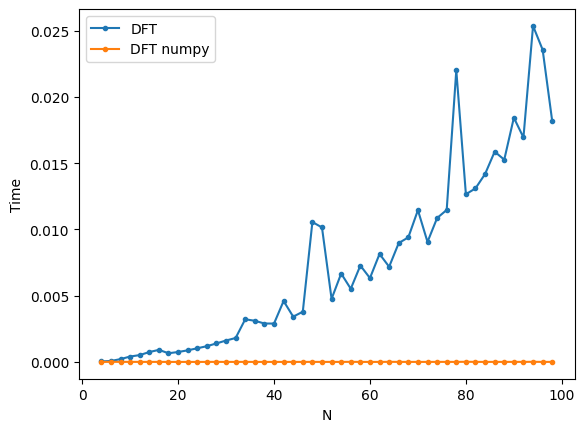

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import timeit

size_range=np.arange(4,100,2)
t_dft=np.zeros(size_range.size)
t_dft_np=np.zeros(size_range.size)
N=1000
print(size_range)
counter=0

stmt1="""

for i in range(n):
  for m in range(n):
    dft_data[i]+=data[m]*np.exp((-1j*m*i*2*np.pi)/n)
  dft_data[i]=dft_data[i]/np.sqrt(n)


"""
stmt2="""

np_dft_data=np.fft.fft(data,norm='ortho')

"""
for j in size_range:
  my_setup="""
import numpy as np
n=%d
data=np.zeros(n,dtype=np.complex_)
for i in range(n):
  data[i]=i

dft_data=np.zeros(n,dtype=np.complex_)
np_dft_data=np.zeros(n,dtype=np.complex_)

"""%(j)
  t_dft[counter]=timeit.timeit(setup=my_setup,stmt=stmt1,number=N)
  t_dft_np[counter]=timeit.timeit(setup=my_setup,stmt=stmt2,number=N)
  counter+=1

t_dft=t_dft/N
t_dft_np=t_dft_np/N
plt.plot(size_range,t_dft,".-",label="DFT")
plt.plot(size_range,t_dft_np,".-",label="DFT numpy")
plt.xlabel("N")
plt.ylabel("Time")
plt.legend()
plt.show()

Q6.

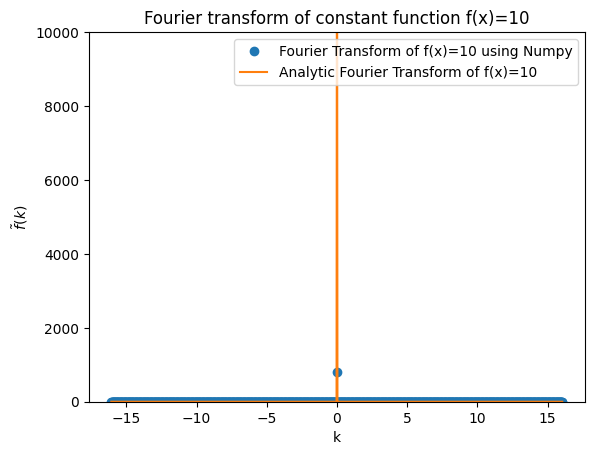

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def f(x):
  return 10

def delta(x):
  if x==0:
   return 16000
  else:
   return 0


n=1024
xmax=100
xmin=-100
dx=(xmax-xmin)/(n-1)
x= np.arange(xmin,xmax+dx,dx,dtype=np.complex_)



data=np.zeros(n,dtype=np.complex_)
analytic=np.zeros(n,dtype=np.complex_)
k=np.fft.fftfreq(n,dx)
k=2*np.pi*k
kk=np.linspace(k.min(),k.max(),num=n,endpoint=True)
for i in range(0,n,1):
  data[i]=f(x[i])
  analytic[i]=delta(kk[i])



nft=np.fft.fft(data,norm='ortho')


aft=dx*np.sqrt(n/(2.0*np.pi))*(np.exp(-1j*k*x.min()))*nft

plt.plot(k,aft.real,"o",label="Fourier Transform of f(x)=10 using Numpy")
plt.plot(kk,analytic.real,"-",label="Analytic Fourier Transform of f(x)=10")
plt.legend()
plt.title("Fourier transform of constant function f(x)=10")
plt.xlabel("k")
plt.ylabel("$\\tilde f (k)$")
axes=plt.gca()
axes.set_ylim([0,10000])
plt.show()

Q10.

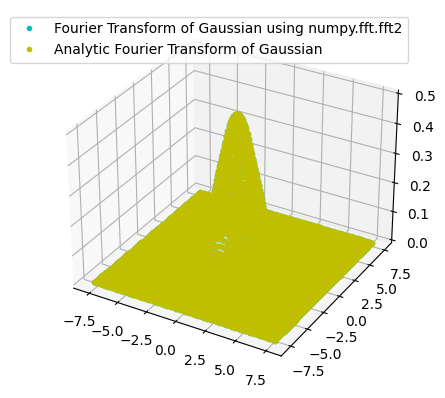

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def gaus(x,y):
  return(np.exp(-(x*x)-(y*y)))

def fftgaus(x,y):
  return(np.exp((-(x*x)-(y*y))/4)/2)


n=100
ymax=xmax=20
ymin=xmin=-20
dx=(xmax-xmin)/(n-1)
dy=(ymax-ymin)/(n-1)
x= np.arange(xmin,xmax+dx,dx,dtype=np.complex_)
y= np.arange(ymin,ymax+dy,dy,dtype=np.complex_)



data=np.zeros([n,n],dtype=np.complex_)

kx=np.fft.fftfreq(n,dx)
ky=np.fft.fftfreq(n,dy)
kx=2*np.pi*kx
ky=2*np.pi*ky

for i in range(0,n,1):
  for j in range(0,n,1):
    data[i][j]=gaus(x[i],y[j])


nft=np.fft.fft2(data,norm='ortho')
#print(nft.size)

aft=np.zeros([n,n],dtype=np.complex_)

for i in range(0,n,1):
  for j in range(0,n,1):
    aft[i][j]=dx*dy*(n/(2.0*np.pi))*(np.exp(-1j*kx[i]*xmin + -1j*ky[j]*ymin ))*nft[i][j]

fig = plt.figure()
ax = plt.axes(projection="3d")

x=np.zeros(n*n)
y=np.zeros(n*n)
z=np.zeros(n*n)
zz=np.zeros(n*n)
for i in range(0,n,1):
  for j in range(0,n,1):
    x[j+i*n]=kx[i]
    y[j+i*n]=ky[j]
    z[j+i*n]=aft[i][j].real
    zz[j+i*n]=fftgaus(kx[i],kx[j])



#print(y)
ax.plot3D(x, y, z, '.c',label="Fourier Transform of Gaussian using numpy.fft.fft2")
ax.plot3D(x, y, zz, '.y',label="Analytic Fourier Transform of Gaussian")
plt.legend()
plt.show()




Q11.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


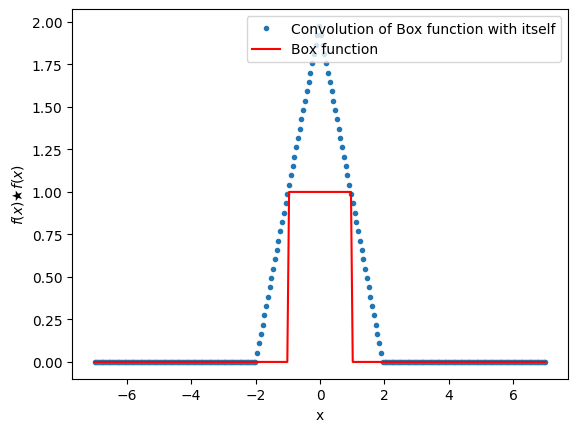

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import scipy as sp
import matplotlib.pyplot as plt

def f1(x):
  if(x>1):
    return 0
  elif(x<-1):
    return 0
  else:
    return 1

def f2(x):
  if(x>1):
    return 0
  elif(x<-1):
    return 0
  else:
    return 1


n=256
data1=np.zeros(n,dtype=np.complex_)
data2=np.zeros(n,dtype=np.complex_)
x=np.zeros(n,dtype=np.complex_)
xmin=-7
xmax=7
dx=(xmax-xmin)/(n-1)
for i in range(n):
  x[i]=xmin + i*dx
  data1[i]=f1(x[i])
  data2[i]=f2(x[i])


dft1=np.fft.fft(data1,norm='ortho')
dft2=np.fft.fft(data2,norm='ortho')
dft=dft1*dft2


conv=np.fft.ifftshift(np.fft.ifft(dft,norm='ortho'))
conv=conv*dx*np.sqrt(n)


plt.plot(x.real,conv.real,".",label="Convolution of Box function with itself")
plt.plot(x.real,data1,color="red",label="Box function")
plt.legend()
plt.ylabel("$f(x) \\bigstar f(x)$")
plt.xlabel("x")
plt.show()

Q12.

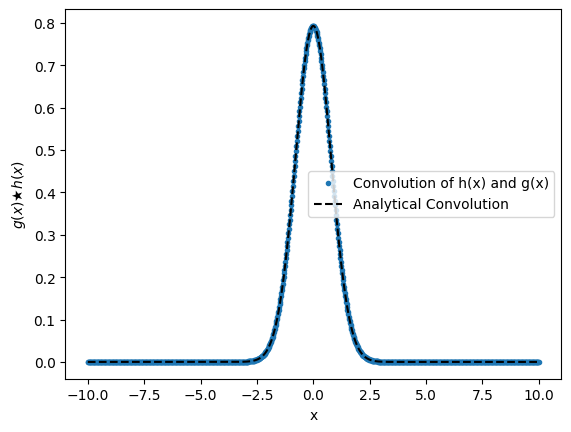

In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import scipy as sp
import matplotlib.pyplot as plt

def f1(x):
  return np.exp(-x**2)

def f2(x):
    return np.exp(-4*x**2)

def analytical(x):
    return (np.sqrt(np.pi/5)*np.exp(-4*x**2 / 5))

n=1024
data1=np.zeros(n,dtype=np.complex_)
data2=np.zeros(n,dtype=np.complex_)
truesol=np.zeros(n,dtype=np.complex_)
x=np.zeros(n,dtype=np.complex_)
xmin=-10
xmax=10
dx=(xmax-xmin)/(n-1)
for i in range(n):
  x[i]=xmin + i*dx
  data1[i]=f1(x[i])
  data2[i]=f2(x[i])
  truesol[i]= analytical(x[i])

dft1=np.fft.fft(data1,norm='ortho')
dft2=np.fft.fft(data2,norm='ortho')
dft=dft1*dft2


conv=np.fft.ifftshift(np.fft.ifft(dft,norm='ortho'))
conv=conv*dx*np.sqrt(n)


plt.plot(x.real,conv.real,".",label="Convolution of h(x) and g(x)")
#plt.plot(x.real,data1,color="red",label="h(x)=exp(-x^2)")
#plt.plot(x.real,data2,color="green",label="g(x)=exp(-4x^2)")
plt.plot(x.real,truesol, "--", color="black",label="Analytical Convolution")
plt.legend()
plt.ylabel("$g(x) \\bigstar h(x)$")
plt.xlabel("x")
plt.show()

Q13.

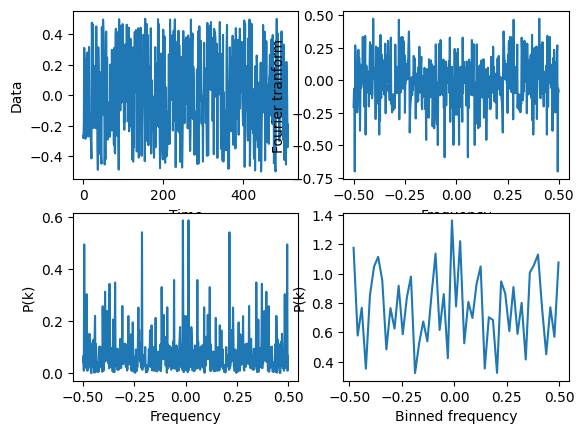

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



with open('noise.txt') as file:
    f = file.readlines()
    f = [float(item.rstrip()) for item in f]


N = len(f)
x = [i for i in range(N)]


dft = np.fft.fft(f,norm='ortho')
k = np.fft.fftfreq(N)

sorted = []
for i in range(N):
    sorted.append([k[i],dft[i]])
sorted.sort(key=lambda x:x[0])

kf,dftf = [],[]
for i in range(N):
    kf.append(sorted[i][0])
    dftf.append(sorted[i][1])


period = [np.abs(x)**2 for x in dftf]



kmin,kmax = kf[0],kf[-1]
bin = 51
delta = (kmax-kmin)/bin
k_bin,per_bin = [],[]

d = delta
n = 0
for i in range(1,bin+1):
    dftb = 0
    #print('i=',i)
    while(kf[n]<kf[0]+i*d):
        dftb = dftb + period[n]
        n = n+1
       # print('n =',n)
        if(n==len(kf)):
            break
    per_bin.append(dftb)
    k_bin.append(kf[0]+i*d)




figure, ax = plt.subplots(2, 2)

ax[0,0].plot(x,f)
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Data')

ax[0,1].plot(kf,dftf)
ax[0,1].set_xlabel('Frequency')
ax[0,1].set_ylabel('Fourier tranform')

ax[1,0].plot(kf,period)
ax[1,0].set_xlabel('Frequency')
ax[1,0].set_ylabel('P(k)')


ax[1,1].plot(k_bin,per_bin)
ax[1,1].set_xlabel('Binned frequency')
ax[1,1].set_ylabel('P(k)')

plt.show()